In [1]:
import MulensModel as mm
import matplotlib.pyplot as plt

In [2]:
my_pspl_model = mm.Model({'t_0': 2452848.06, 'u_0': 0.133, 't_E': 61.5})
my_1S2L_model = mm.Model({'t_0': 2452848.06, 'u_0': 0.133,
     't_E': 61.5, 'rho': 0.0008, 'q': 0.009, 's': 1.120,
     'alpha': 223.8})
my_1S2L_model.set_magnification_methods([2452833., 'VBBL', 2452845.])

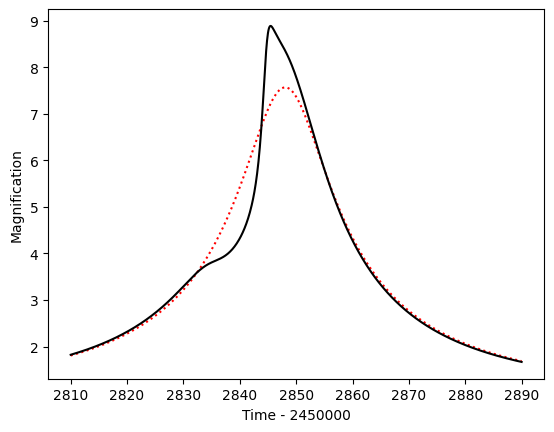

In [3]:
my_pspl_model.plot_magnification(t_range=[2452810, 2452890],
    subtract_2450000=True, color='red', linestyle=':')
my_1S2L_model.plot_magnification(t_range=[2452810, 2452890],
    subtract_2450000=True, color='black')
plt.show()

In [4]:
from astropy.io import ascii
import os
from tqdm import tqdm

# Read the IPAC file
directory = os.fsencode("1")

curves = []

for file in tqdm(os.listdir(directory)):
    filename = os.fsdecode(file)
    curve = ascii.read('1/' + filename, format='ipac') 
    curves.append(curve)

  0%|          | 0/3022 [00:00<?, ?it/s]

100%|██████████| 3022/3022 [02:37<00:00, 19.17it/s]


In [5]:
sample = curves[0:100]

4606 --


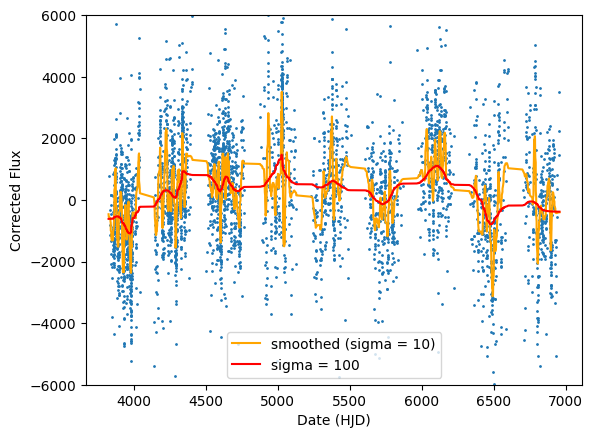

In [6]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import numpy as np

curve = sample[0]
plt.scatter(curve['HJD'], curve["cor_flux"], s=1)

mask = np.isnan(curve["cor_flux"]) | (curve["cor_flux"] == 0)

print(len(mask), sum(mask))
masked_array = np.ma.array(curve["cor_flux"], mask=mask)
masked_HJD = np.ma.array(curve["HJD"], mask=mask)

smoothed = gaussian_filter(masked_array, sigma=10)
plt.plot(curve['HJD'], smoothed, color="orange", label="smoothed (sigma = 10)")
supa_smooth = gaussian_filter(masked_array, sigma=100)
plt.plot(curve['HJD'], supa_smooth, color="red", label="sigma = 100")
plt.ylabel("Corrected Flux")
plt.xlabel("Date (HJD)")
plt.ylim(-6000, 6000)

plt.legend()
#plt.yscale('log')

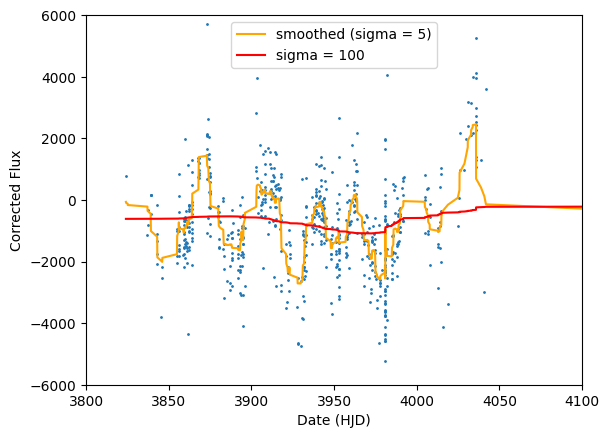

In [7]:
plt.scatter(curve['HJD'], curve["cor_flux"], s=1)
smooth = gaussian_filter(masked_array, sigma=5)
plt.plot(curve['HJD'], smooth, color="orange", label="smoothed (sigma = 5)")
plt.plot(curve['HJD'], supa_smooth, color="red", label="sigma = 100")
plt.ylim(-6000, 6000)
plt.xlim(3800, 4100)
plt.ylabel("Corrected Flux")
plt.xlabel("Date (HJD)")
plt.legend()
#plt.yscale('log')

In [41]:
from tqdm import tqdm

header = []
table = []
with open("out.txt", "a") as write_file:
    with open('metadata.ipac', 'r') as file:
        i = 0
        for line in tqdm(file):
            if i == 0:
                write_file.write(line.strip() + "\n")
                header = line[1:-2].replace(" ", "").split('|')
            elif i > 3:
                row = line.split()
                if row[19] != "null":
                    #print("event!")
                    table.append(row)
                    write_file.write(line.strip() + "\n")
            i+=1

import pandas as pd
#print(header.index('pspl_t0'))
#df = pd.DataFrame(table, columns=header)

2409065it [00:29, 81176.38it/s] 


In [19]:
from astropy.io import ascii

metadata = ascii.read('metadata.ipac', format='ipac') 


KeyboardInterrupt: 